In [ ]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import time

In [ ]:
#df=pd.read_csv('/content/mnist_train.csv')

In [ ]:
mnist=fetch_openml('mnist_784')

In [ ]:
#mnist

In [ ]:
x=mnist['data'].to_numpy()
y=mnist['target'].astype(int).to_numpy()

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

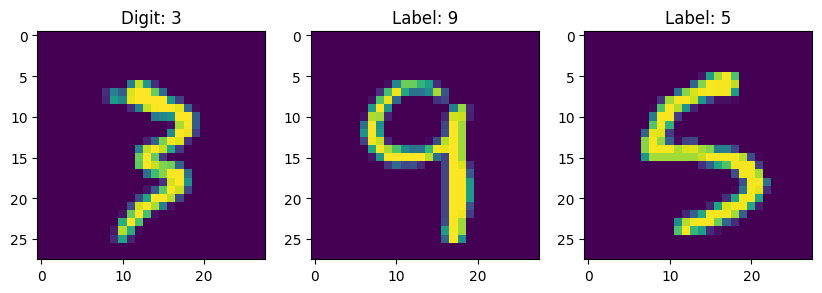

<Figure size 640x480 with 0 Axes>

In [ ]:
dig=x[25000]
img=dig.reshape(28,28)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(img)
axes[0].set_title(f"Digit: {y[25000]}")



dig2=x[39000]
img2=dig2.reshape(28,28)
axes[1].imshow(img2)
axes[1].set_title(f"Label: {y[39000]}")



dig3 = x[15000]
img3 = dig3.reshape(28, 28)
axes[2].imshow(img3)
axes[2].set_title(f"Label: {y[15000]}")


plt.show()

plt.tight_layout()

In [ ]:
print(y[25000])

3


In [ ]:
## Normalize

x = x / 255


In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:

mnist.data.shape

(70000, 784)

In [ ]:
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

#60% train, 40% temp
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)



x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score


def euclidean_distance(train_data, test_sample):
    return np.sqrt(np.sum((train_data - test_sample) ** 2, axis=1))


def predict_one(x_train, y_train, test_sample, k):
    distances = euclidean_distance(x_train, test_sample)
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return Counter(k_labels).most_common(1)[0][0]


def predict(x_train, y_train, x_test, k):
    return np.array([predict_one(x_train, y_train, x, k) for x in x_test])


def score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


k=1, Accuracy without PCA=0.9696
k=3, Accuracy without PCA=0.9709
k=5, Accuracy without PCA=0.9689
k=7, Accuracy without PCA=0.9666
k=9, Accuracy without PCA=0.9666


In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 16, 2))
val_accuracies = []

# Using smaller subset for speed
x_train_small = x_train[:2000]
y_train_small = y_train[:2000]
x_val_small = x_val[:500]
y_val_small = y_val[:500]

for k in k_values:
    y_pred = predict(x_train_small, y_train_small, x_val_small, k)
    acc = score(y_val_small, y_pred)
    print(f"k={k}, Accuracy without PCA={acc:.4f}")
    val_accuracies.append(acc)


k=1, Accuracy without PCA=0.9220
k=3, Accuracy without PCA=0.9240
k=5, Accuracy without PCA=0.9140
k=7, Accuracy without PCA=0.9060
k=9, Accuracy without PCA=0.9040
k=11, Accuracy without PCA=0.9000
k=13, Accuracy without PCA=0.9020
k=15, Accuracy without PCA=0.8940


***After Applying PCA***

In [ ]:
##########3333333

In [ ]:
x_pca, components, k_used, var_explained = manual_pca(x, 0.90)


In [ ]:
from sklearn.model_selection import train_test_split


x_centered = x - np.mean(x, axis=0)

cov_matrix = np.cov(x_centered, rowvar=False)


eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Sort eigen in descending order
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]


# retain 95% variance
explained_variance_ratio = np.cumsum(eig_vals_sorted) / np.sum(eig_vals_sorted)
num_components = np.where(explained_variance_ratio >= 0.95)[0][0] + 1

print(f"Retaining {num_components} components ")


# top eigenvectors
principal_components = eig_vecs_sorted[:, :num_components]


x_pca = np.dot(x_centered, principal_components)


Retaining 154 components 


k=1, Validation Accuracy=0.9725
k=3, Validation Accuracy=0.9751
k=5, Validation Accuracy=0.9736
k=7, Validation Accuracy=0.9729
k=9, Validation Accuracy=0.9715
k=11, Validation Accuracy=0.9705
k=13, Validation Accuracy=0.9695
k=15, Validation Accuracy=0.9680


In [ ]:
# Train-validation-test split using reduced data
x_train_pca, x_temp_pca, y_train_pca, y_temp_pca = train_test_split(x_pca, y, test_size=0.4, random_state=42)
x_val_pca, x_test_pca, y_val_pca, y_test_pca = train_test_split(x_temp_pca, y_temp_pca, test_size=0.5, random_state=42)


In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 16, 2))
val_accuracies = []

# Using subset for speed
x_train_small_pca = x_train_pca[:2000]
y_train_small_pca = y_train_pca[:2000]
x_val_small_pca = x_val_pca[:500]
y_val_small_pca = y_val_pca[:500]

for k in k_values:
    y_pred = predict(x_train_small_pca, y_train_small_pca, x_val_small_pca, k)
    acc = score(y_val_small_pca, y_pred)
    print(f"k={k}, Accuracy after PCA={acc:.4f}")
    val_accuracies.append(acc)

k=1, Validation Accuracy=0.9260
k=3, Validation Accuracy=0.9260
k=5, Validation Accuracy=0.9180
k=7, Validation Accuracy=0.9180
k=9, Validation Accuracy=0.9160
k=11, Validation Accuracy=0.9100
k=13, Validation Accuracy=0.9080
k=15, Validation Accuracy=0.9060


In [ ]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_test_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
# Step 7: 3D Plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='tab10', s=8)

legend = ax.legend(*scatter.legend_elements(), title="Digits", loc="best")
ax.add_artist(legend)

ax.set_title("3D PCA Projection of MNIST")
plt.show()

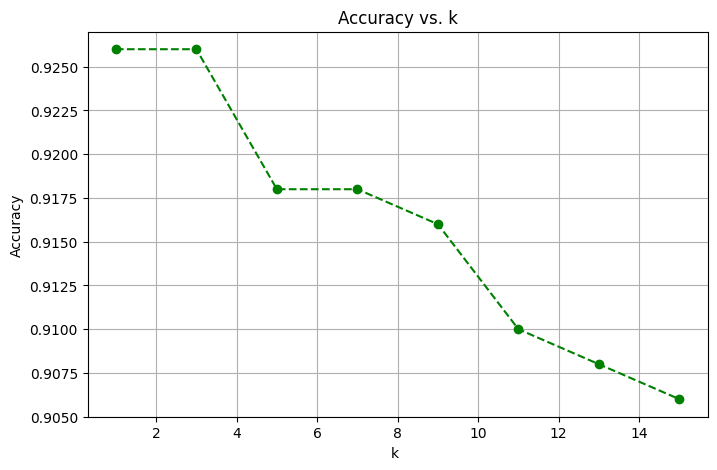

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o', linestyle='--', color='green')
plt.title("Accuracy vs. k")
plt.xlabel("k ")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


#At k = 3, the graph peaks with the highest accuracy (~92.4%).
#As k increases (5, 7, 9, etc.), the accuracy steadily decreases.



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


kk = 10

#using smaller data set cuz larger set takes longer time
x_train_best = x_train[:2000]
y_train_best = y_train[:2000]
x_test_small = x_test[:500]
y_test_small = y_test[:500]


y_test_pred = predict(x_train_best, y_train_best, x_test_small, kk)


cm = confusion_matrix(y_test_small, y_test_pred)
print("Confusion Matrix:\n", cm)


report = classification_report(y_test_small, y_test_pred)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[44  0  0  0  0  1  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0]
 [ 0  7 37  0  0  0  0  1  1  1]
 [ 0  1  0 49  0  0  0  2  2  0]
 [ 0  1  0  0 25  0  0  0  0  3]
 [ 0  1  0  5  0 48  2  0  0  3]
 [ 1  0  0  0  0  0 40  0  0  0]
 [ 0  4  1  0  0  0  0 44  0  0]
 [ 0  2  0  1  0  1  0  1 46  1]
 [ 1  1  0  0  1  0  0  1  0 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.80      1.00      0.89        70
           2       0.97      0.79      0.87        47
           3       0.89      0.91      0.90        54
           4       0.96      0.86      0.91        29
           5       0.96      0.81      0.88        59
           6       0.95      0.98      0.96        41
           7       0.90      0.90      0.90        49
           8       0.94      0.88      0.91        52
           9       0.86      0.93      0.89        54

    accuracy                 

k=1, Validation Accuracy=0.9180
k=3, Validation Accuracy=0.9300
k=5, Validation Accuracy=0.9140
k=7, Validation Accuracy=0.9120
k=9, Validation Accuracy=0.9060
k=11, Validation Accuracy=0.9020
k=13, Validation Accuracy=0.9040
k=15, Validation Accuracy=0.9000
